1. Firstly we are going to import the data. The data is given in a csv format so we are going to import the data using the pandas.

In [13]:
import pandas as pd

train_df = pd.read_csv('input/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Lets take a look at the five first rows od our dataset

In [14]:
train_df.head(n=5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Then we are going to get some usefull info about the shape, the format and the type of our dataset.

In [15]:
train_df.shape

(1470, 35)

So we have 1470 samples wich are cinsisted by 35 features. (We are going to use the 'Attrition' column as the dependent variable in ourr case and the other 34 as independent variables).

Then we have to examine the types of data each column has.

In [16]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()

dtype_df

,Column Type,Count
0,int64,26
1,object,9


So, the 26 features have numerical data and the 8 have categorical. Our output has categorical data as well.

Then we have to see if our data have missing (null) values

In [17]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

missing_df

,column_name,missing_count


So, there are no missing value in the dataset.

Then we have to get an better insight about each feature, like the number of unique values 

In [18]:
import numpy as np

unique_values_dict = {}
for col in train_df.columns:
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

('Columns containing the unique values : ', '[0, 1, 2, 3]')
['StockOptionLevel']
--------------------------------------------------
('Columns containing the unique values : ', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]')
['YearsInCurrentRole']
--------------------------------------------------
('Columns containing the unique values : ', '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]')
['YearsSinceLastPromotion']
--------------------------------------------------
('Columns containing the unique values : ', '[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 88, 90, 91, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 110, 112, 113, 116, 117, 118, 119, 120, 121, 124, 125, 126, 128, 129, 131, 132, 133, 134, 137, 138, 139, 140, 141, 

As we can see the features Over18,StandardHours and EmployeeCount have only one value and they have not any usefull info. Also EmployeeNumber is like id and it has not any usefull info. We should remove theese features from our analysis and predictive model.

In [19]:
y = train_df.Attrition

train_df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'], axis=1, inplace=True)

Then we are going to separate the categorical from numerical features in order to visualize them, as histogram function is not applicable to categorical data.

In [20]:
categorical_cols  = []

for c in train_df.columns:
   if train_df[c].dtype == 'object' and str(c) !='Attrition':
       categorical_cols.append(c)
       
numerical_cols = [c for c in train_df.columns if (c not in categorical_cols and str(c) !='Attrition')]
       
categorical_cols
# numerical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Lets create some visualizations to see if we can get extra informations about the data. But firstly we will change the Attrition values from 'Yes'->1 and 'No'->0

In [21]:
y= y.eq('Yes').mul(1)

Next we will see the Attrition Distribution

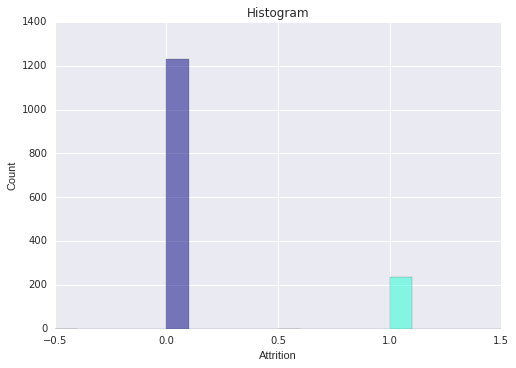

In [22]:
import matplotlib.pyplot as plt

plt.hist(y[y == 0], alpha=0.5, label='No', color=plt.cm.jet(0))
plt.hist(y[y == 1], alpha=0.5, label='Yes', color=plt.cm.jet(100))
plt.title("Histogram")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

So we can see that we have a very imbalanced dataset, we can overcome this with many ways. We can over- or down-sample our dataset, or we can use the class weight parameter that we have in many algorithms. There is a link where many ways are mentioned. http://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

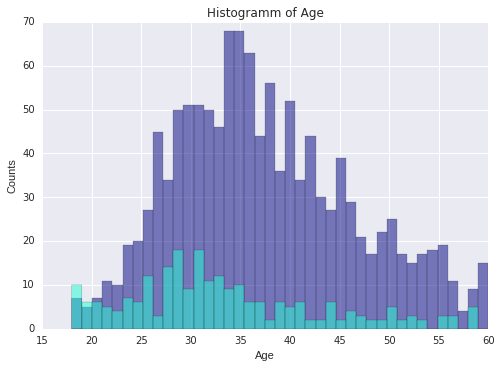

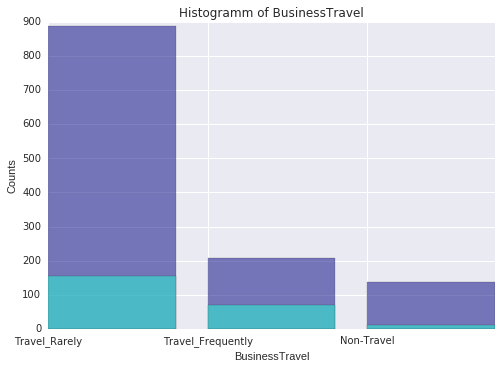

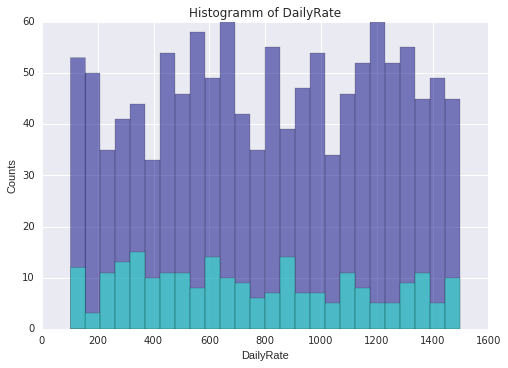

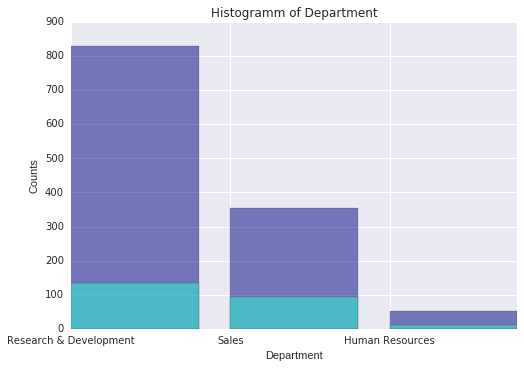

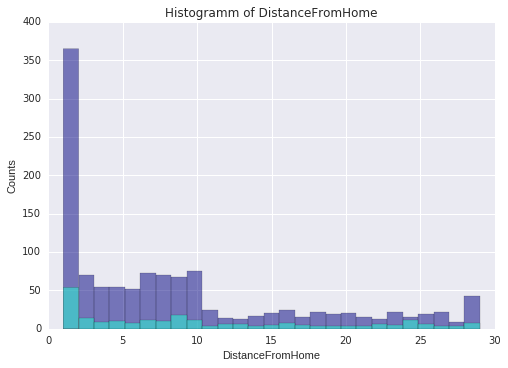

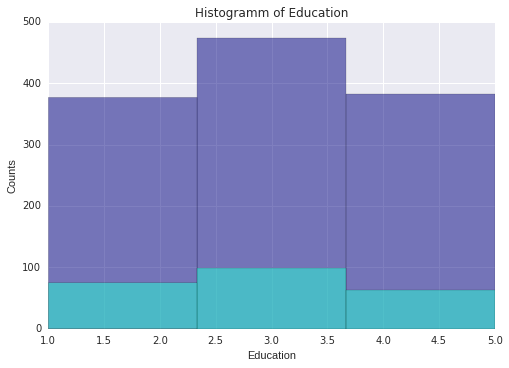

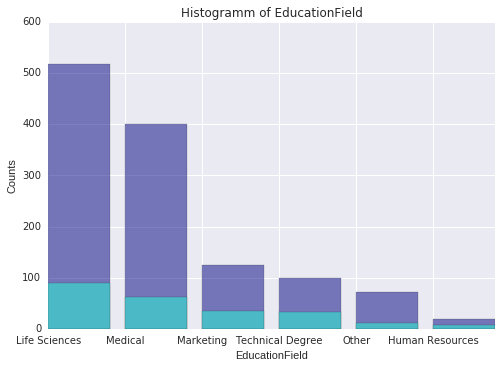

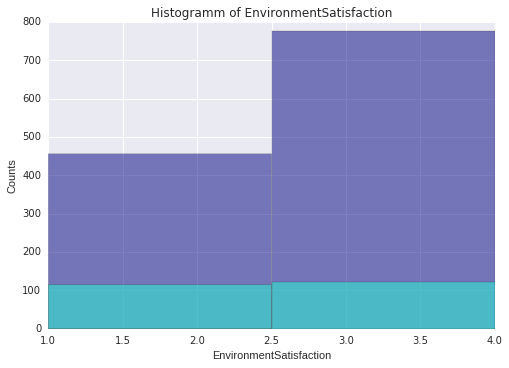

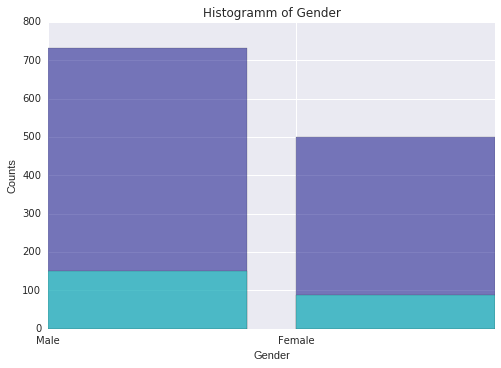

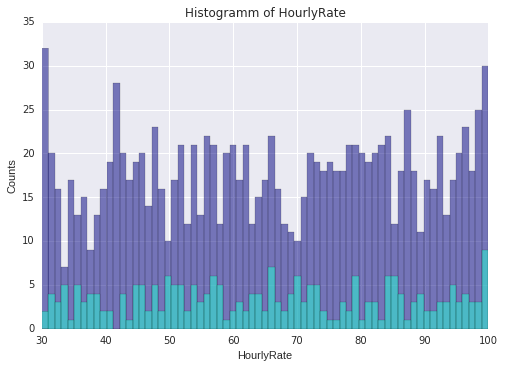

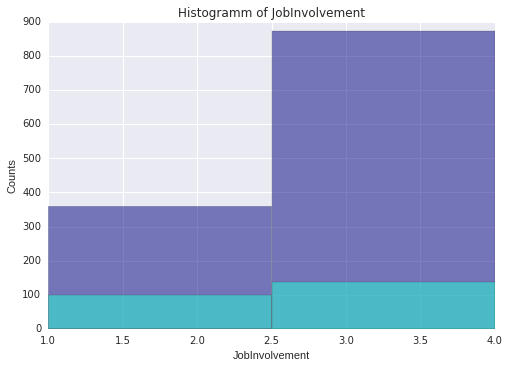

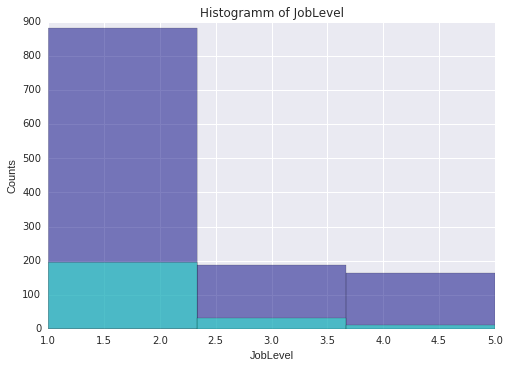

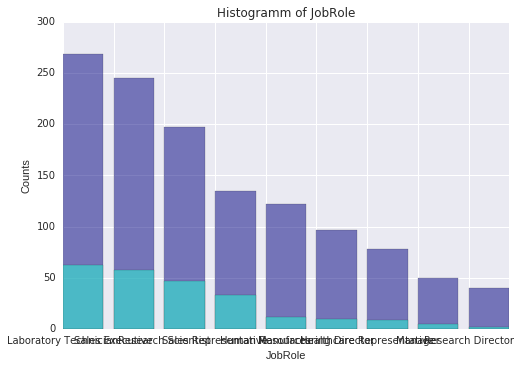

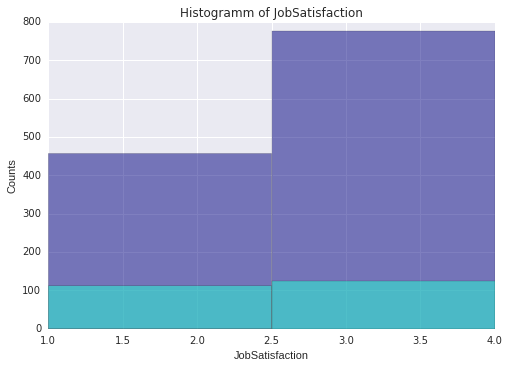

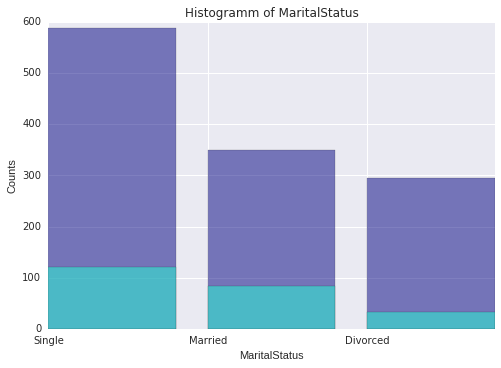

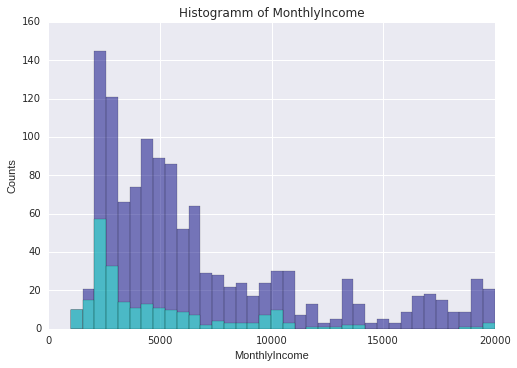

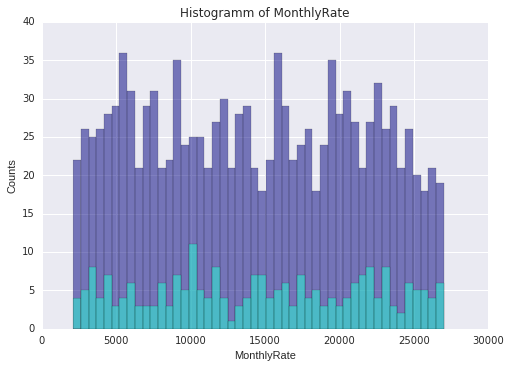

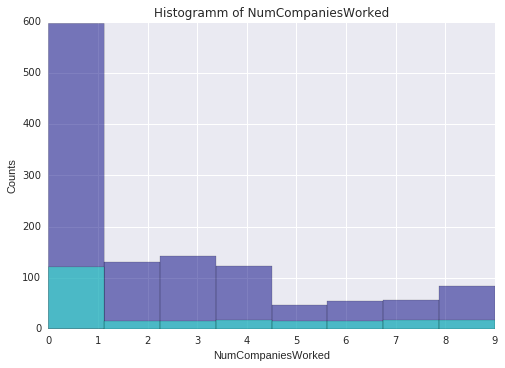

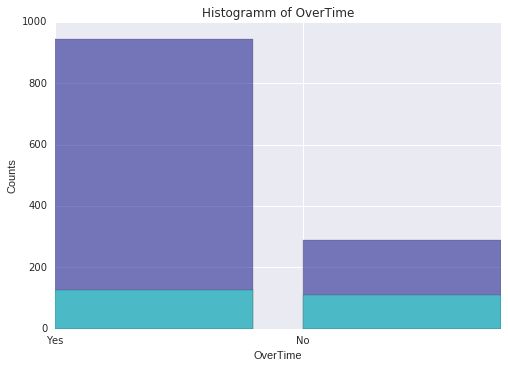

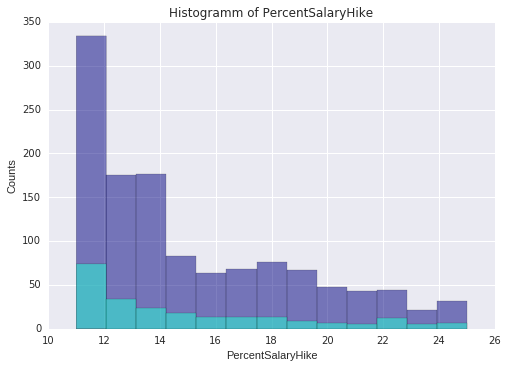

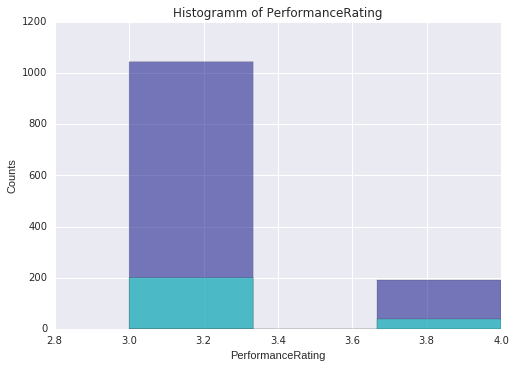

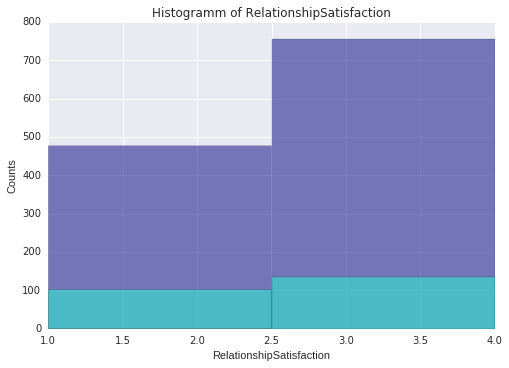

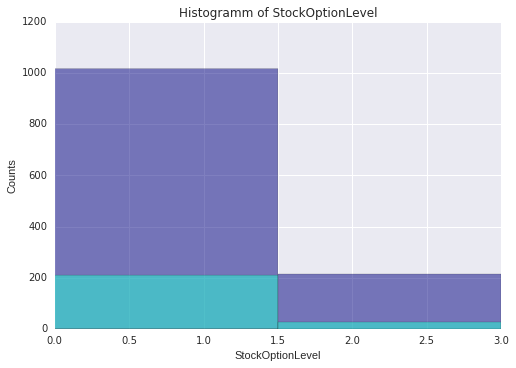

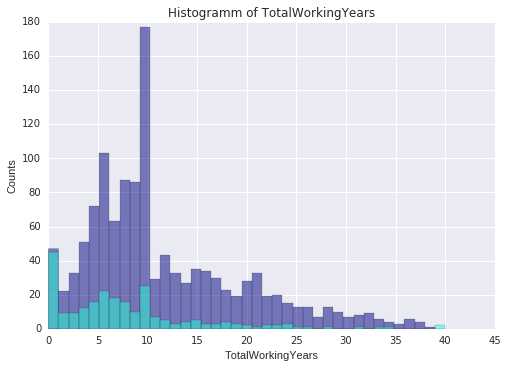

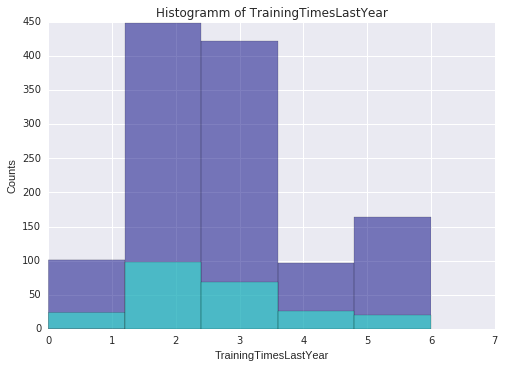

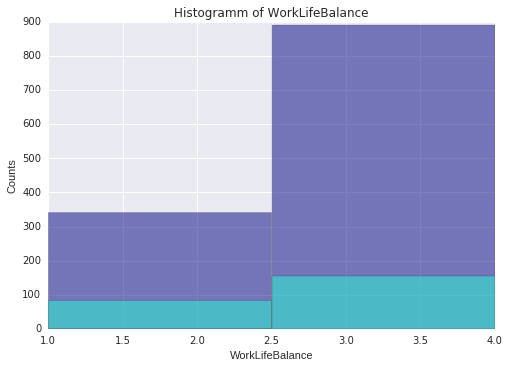

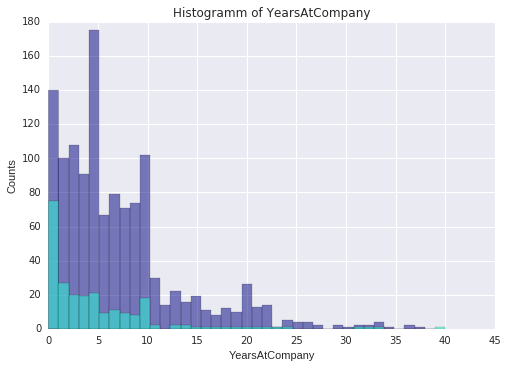

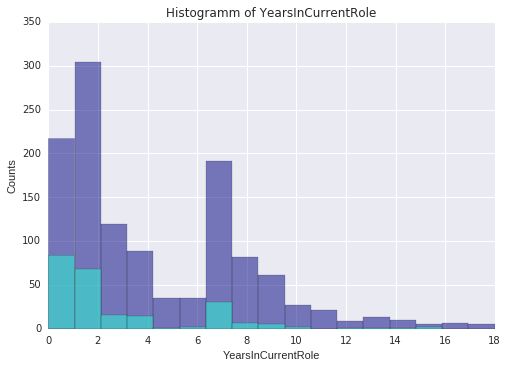

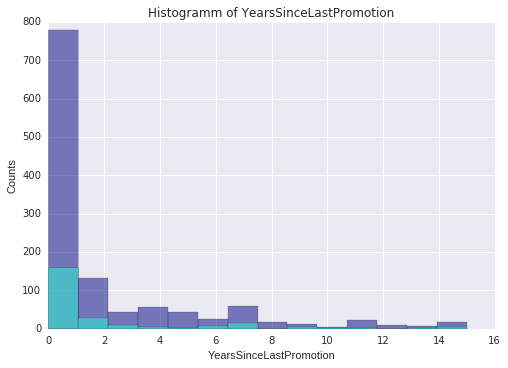

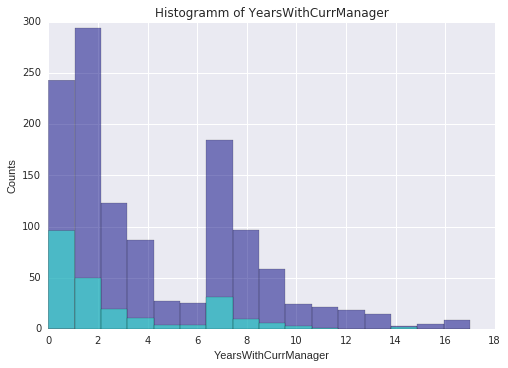

In [23]:
from collections import Counter


for col in train_df.columns:
    var = train_df[col]
    if col in categorical_cols:
        yes_var = var[y == 1]
        no_var = var[y == 0]
        yes_values_counts = Counter(yes_var)
        no_values_counts = Counter(no_var)
        yes_common = yes_values_counts.most_common()
        no_common = no_values_counts.most_common()

        yes_labels = [item[0] for item in yes_common]
        yes_number = [item[1] for item in yes_common]

        no_labels = [item[0] for item in no_common]
        no_number = [item[1] for item in no_common]

        yes_nbars = len(yes_common)
        no_nbars = len(no_common)

        plt.bar(np.arange(no_nbars), no_number, alpha=0.5, tick_label=no_labels, color=plt.cm.jet(0))
        plt.bar(np.arange(yes_nbars), yes_number, alpha=0.5, tick_label=yes_labels, color=plt.cm.jet(100))
        plt.title('Histogramm of '+ str(var.name))
        plt.xlabel(var.name)
        plt.ylabel("Counts")
        plt.show()
    elif col in numerical_cols:
        if var.max()-var.min() < 2:
            num = 4
        elif var.max()-var.min() >10000:
            num = (var.max()-var.min())/500
        elif var.max() - var.min() > 1000:
            num = (var.max() - var.min()) / 50
        elif var.max()-var.min() >100:
            num = (var.max()-var.min())/5
        else:
            num = var.max()-var.min()

        bins = np.linspace(var.min(), var.max(), num)
        plt.hist(var[y == 0], bins = bins, alpha=0.5, label='No', color=plt.cm.jet(0))
        plt.hist(var[y == 1], bins = bins, alpha=0.5, label='Yes', color=plt.cm.jet(100))
        plt.title('Histogramm of '+ str(var.name))
        plt.xlabel(var.name)
        plt.ylabel("Counts")
        plt.show()

We can also create bi-variate scatter plots in order to extract useful insights.For the time being we are using only the Age feature as second Variable (just as an example). Then we can repeat the sesion using all the feature combinations.

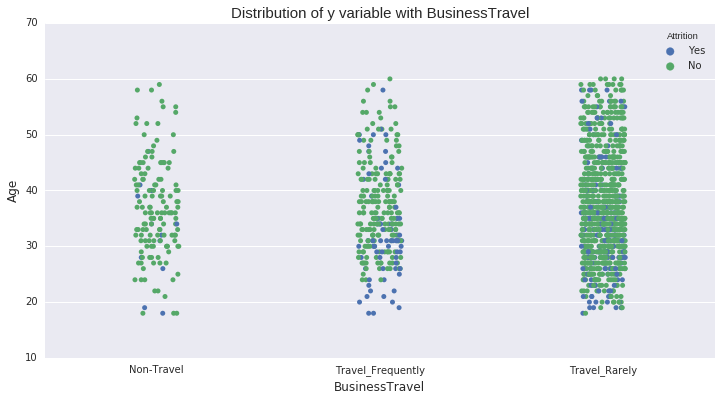

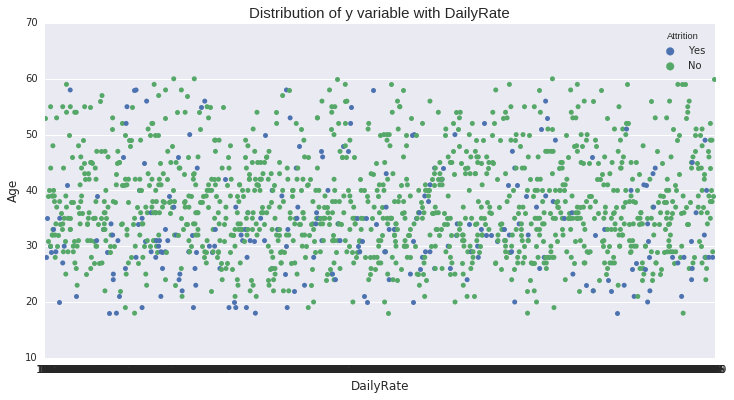

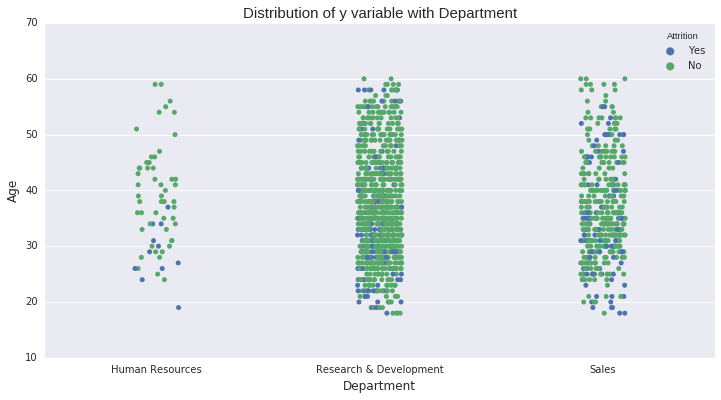

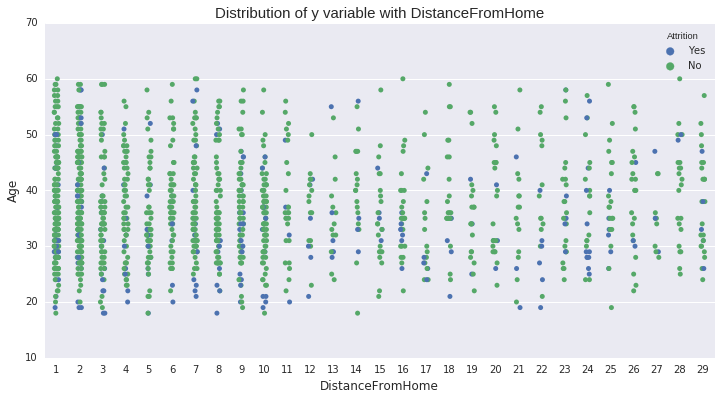

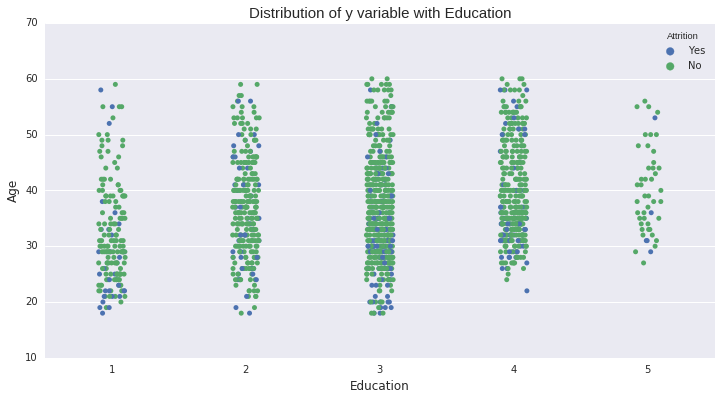

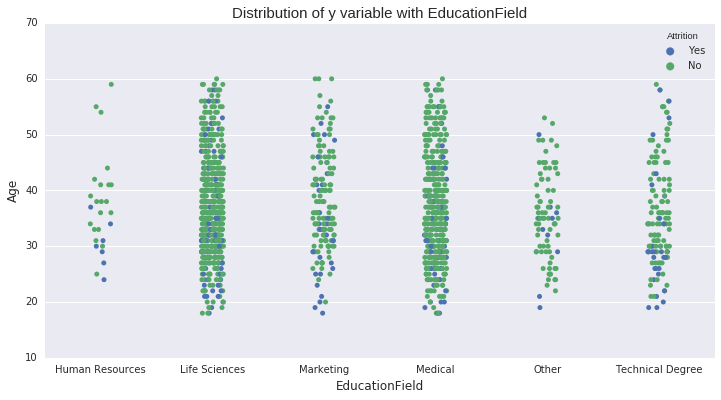

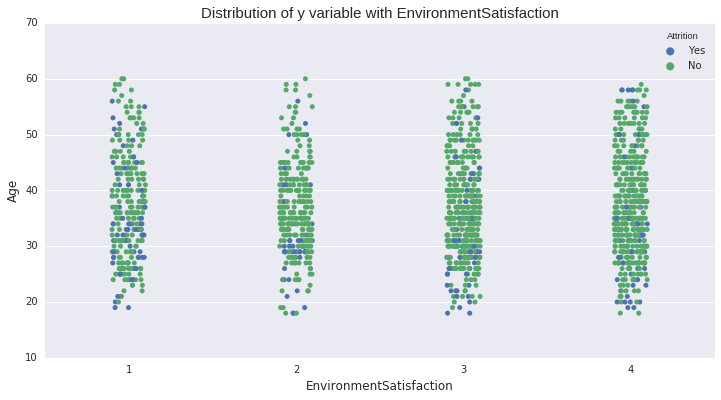

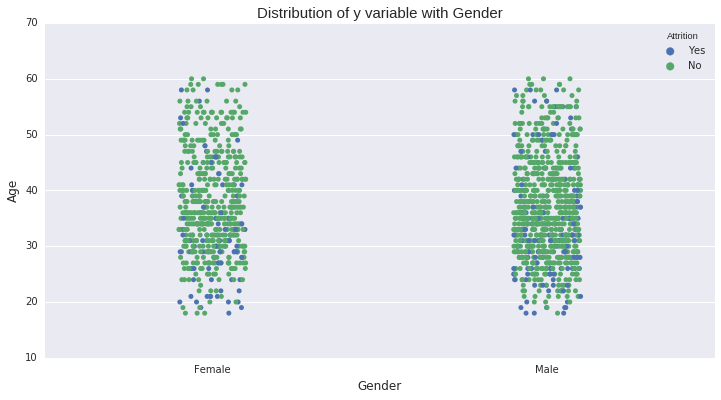

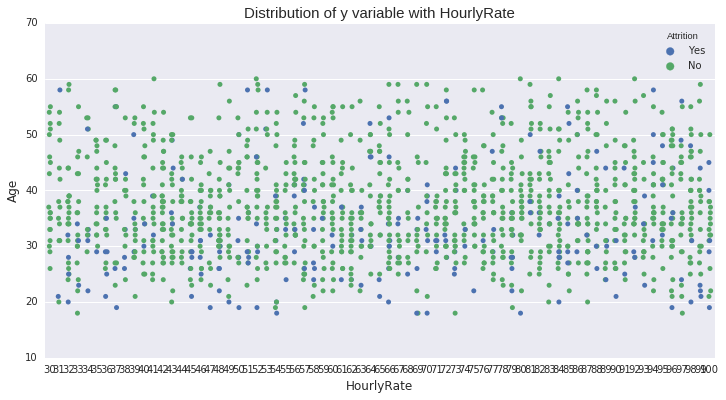

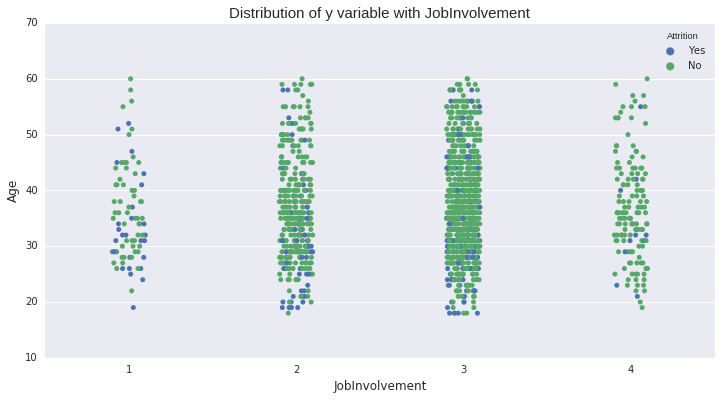

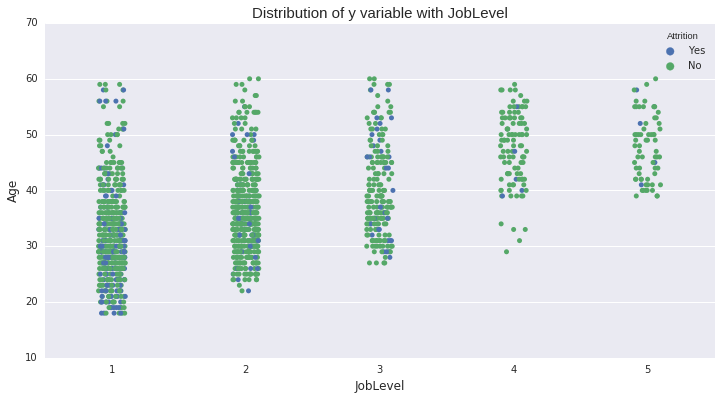

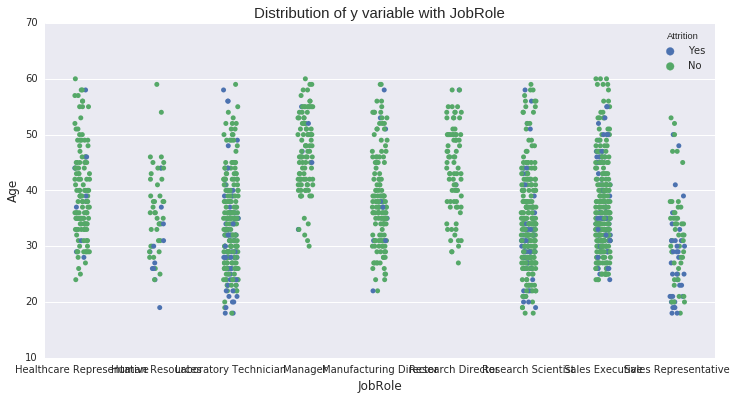

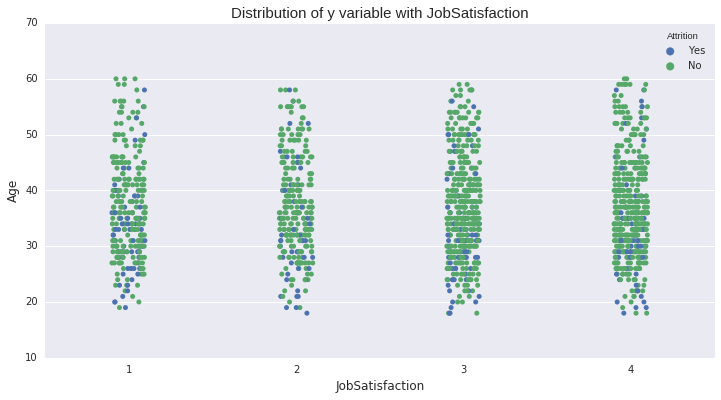

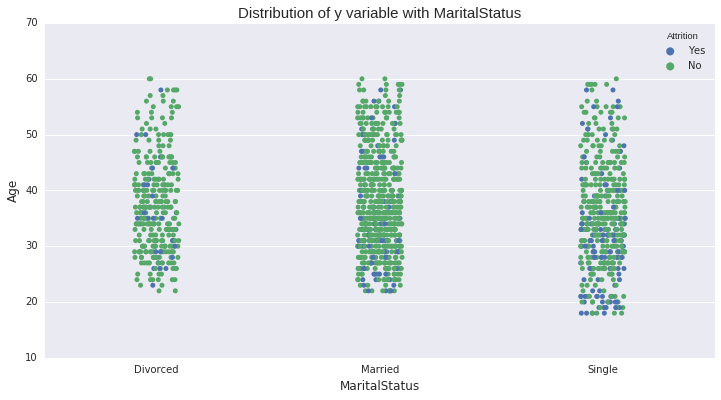

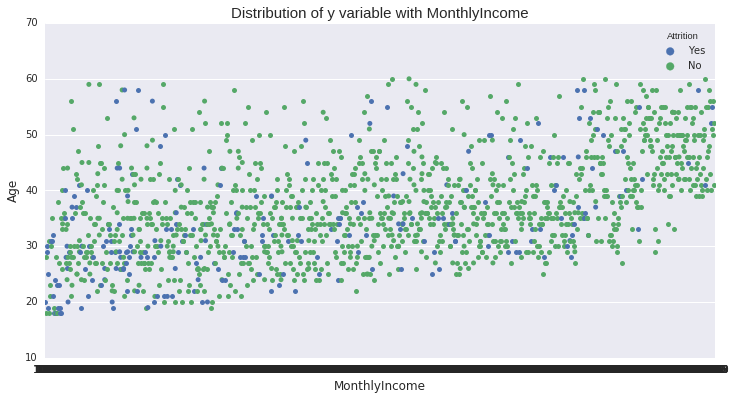

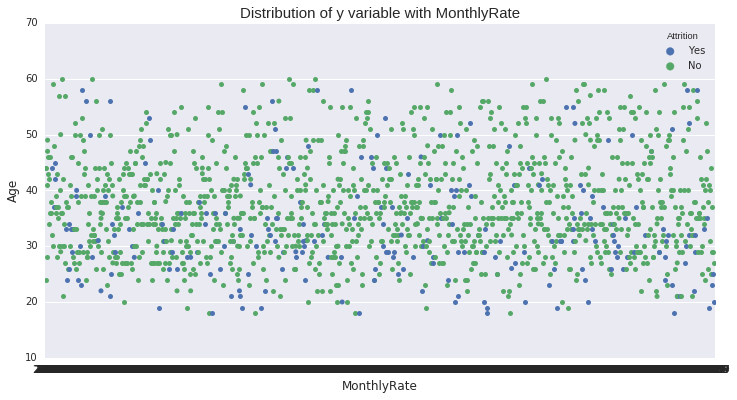

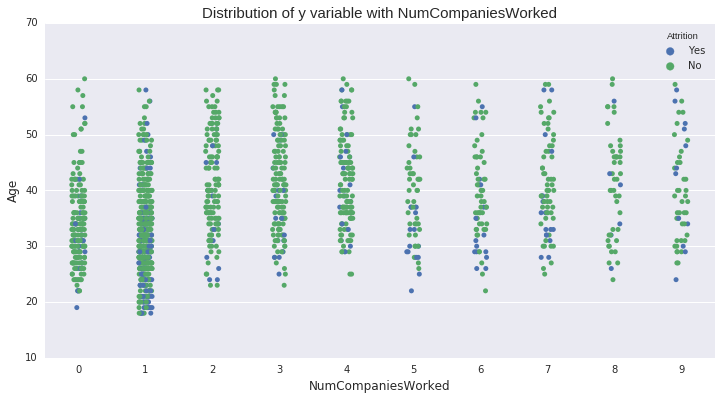

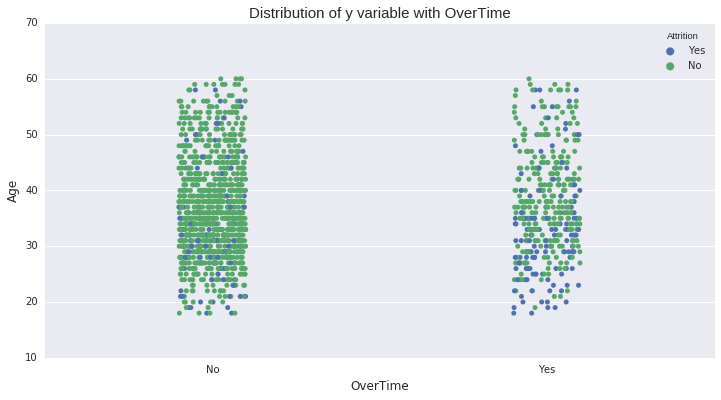

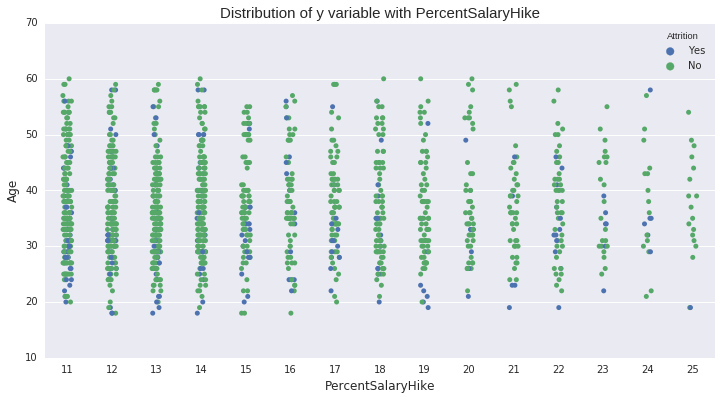

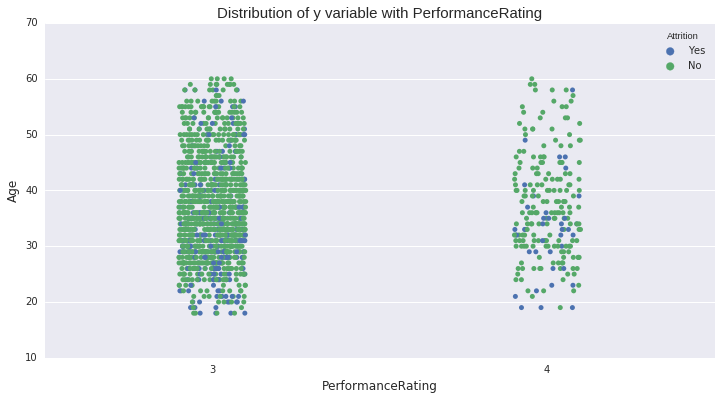

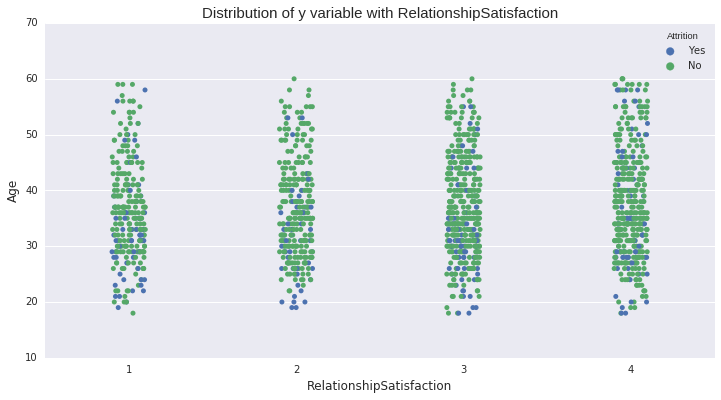

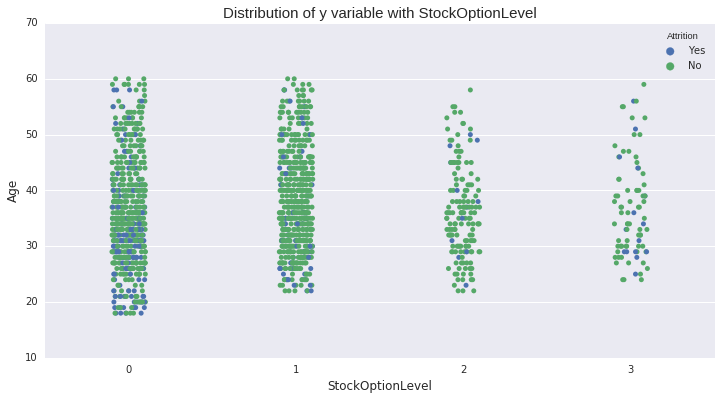

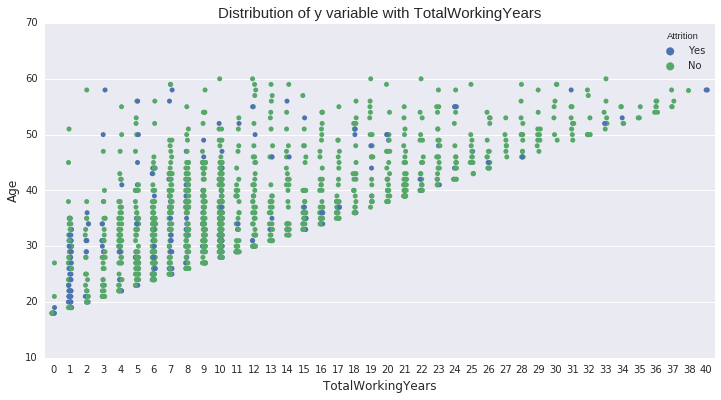

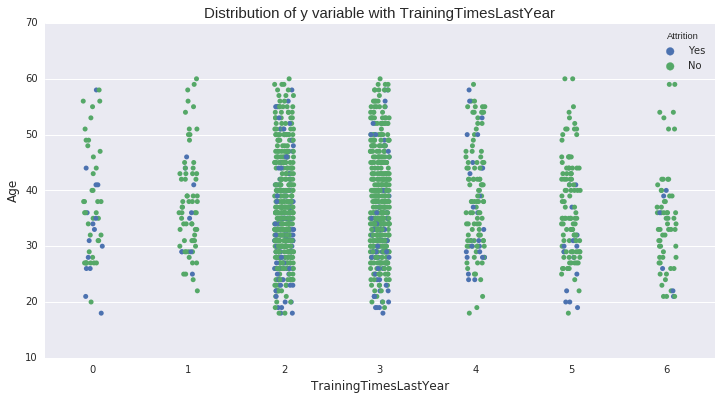

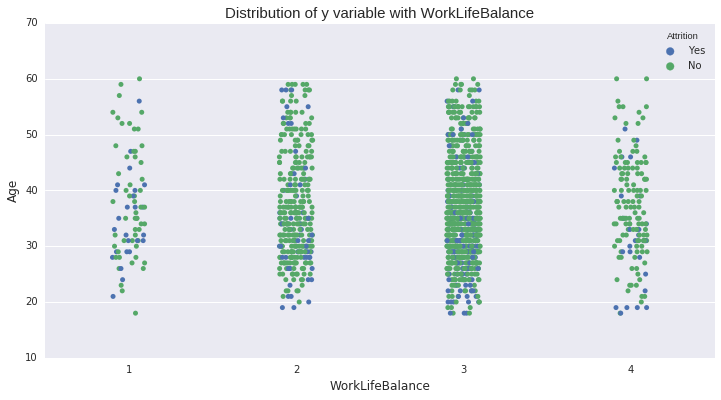

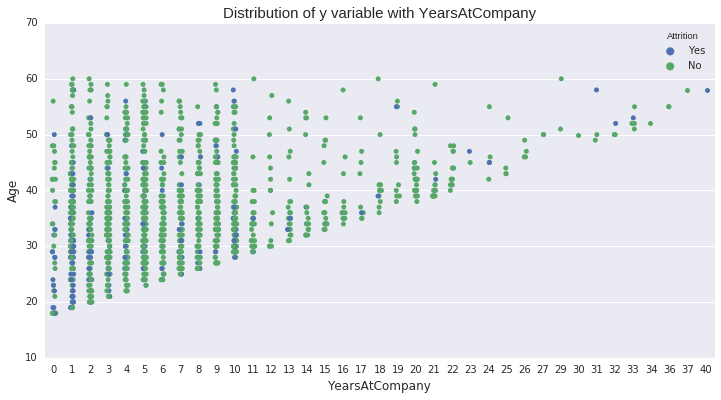

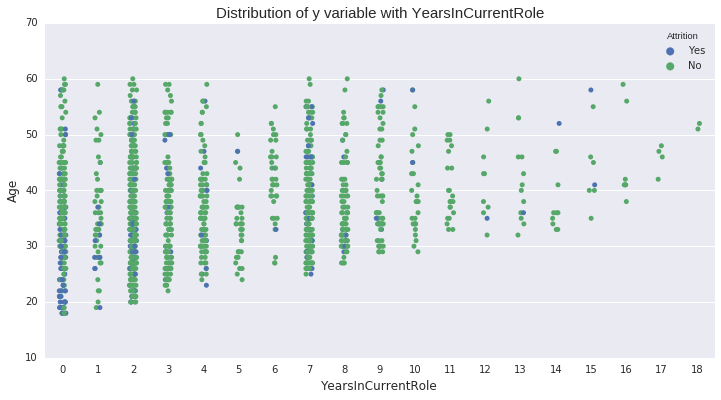

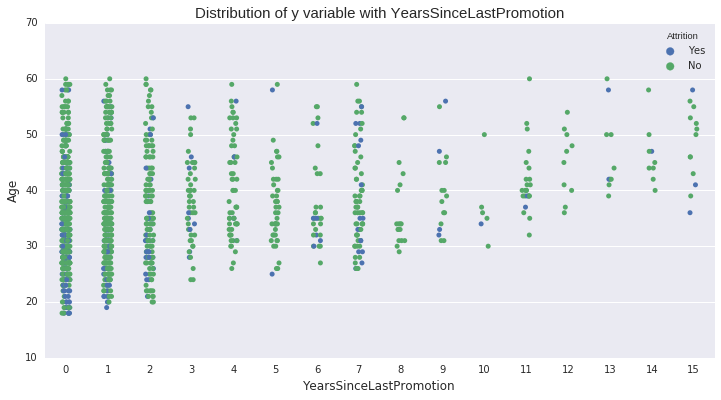

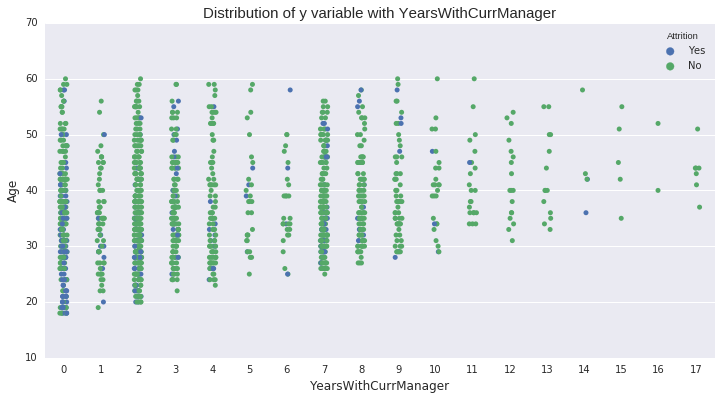

In [24]:
import seaborn as sns

for col in train_df.columns:
    if str(col) !='Attrition' and str(col) != 'Age':
    
        var = train_df[col]
        var_name = var.name
        col_order = np.sort(train_df[var_name].unique()).tolist()
        plt.figure(figsize=(12,6))
        sns.stripplot(x=var_name, y='Age', hue= 'Attrition', data=train_df, jitter=True, order=col_order)
        plt.xlabel(var_name, fontsize=12)
        plt.ylabel('Age', fontsize=12)
        plt.title("Distribution of y variable with "+var_name, fontsize=15)
        plt.show()

Finally we have to see the correlations between the features. Because it is better not to use higly correlated features espacialy in regression models.

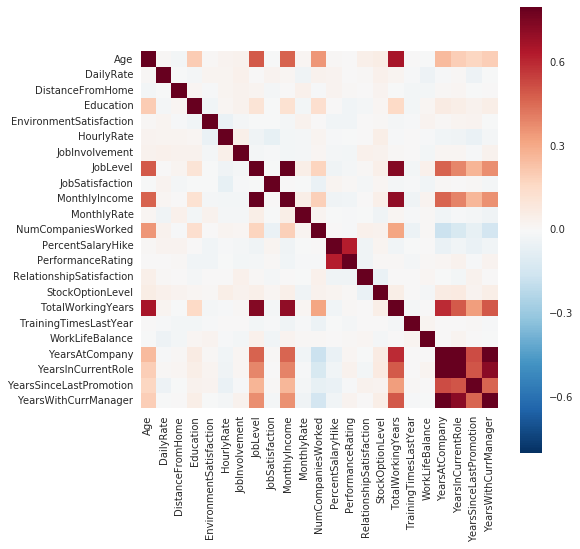

In [25]:
corrmat = train_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

plt.xticks(rotation=90)
plt.yticks(rotation=90)
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Some of the feature are higly correlated. Such as YearsAtCompany and YearsInCurrentRole and YearsAtCompany. At this time we will not remove any of them. We will have this in mind when we are going to build our model.

Finaly we have to transform the categorical values. There are 2 basic transormations. To do this, I shall use the get_dummies method from Pandas which creates encoded dummy variables from the categorical variables, and the second approach is LabelEncoder() from scikit.

2. Building  and evaluating predictive models. We use 5 fold cross validation as evaluating method.

In [26]:
train_df.drop(['Attrition'], axis=1, inplace=True)
train_df = pd.get_dummies(train_df, drop_first=True)

train_df.columns

Index([u'Age', u'DailyRate', u'DistanceFromHome', u'Education',
       u'EnvironmentSatisfaction', u'HourlyRate', u'JobInvolvement',
       u'JobLevel', u'JobSatisfaction', u'MonthlyIncome', u'MonthlyRate',
       u'NumCompaniesWorked', u'PercentSalaryHike', u'PerformanceRating',
       u'RelationshipSatisfaction', u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager', u'BusinessTravel_Travel_Frequently',
       u'BusinessTravel_Travel_Rarely', u'Department_Research & Development',
       u'Department_Sales', u'EducationField_Life Sciences',
       u'EducationField_Marketing', u'EducationField_Medical',
       u'EducationField_Other', u'EducationField_Technical Degree',
       u'Gender_Male', u'JobRole_Human Resources',
       u'JobRole_Laboratory Technician', u'JobRole_Manager',
       u'JobRole_Manufacturing Director', u'JobRole_Researc

In [27]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


train = train_df
en = LogisticRegression(C=0.5)

rf = RandomForestClassifier(n_estimators=100, n_jobs=2, max_depth=6,)

et = ExtraTreesClassifier(n_estimators=100, n_jobs=4, max_depth=6,)

ca = CalibratedClassifierCV(base_estimator=rf, method='sigmoid')


xgbm = xgb.sklearn.XGBClassifier(max_depth=6, learning_rate=0.05,
                                n_estimators=1000)

lgbm = lgb.LGBMClassifier(nthread=3,silent=True,learning_rate=0.05,max_depth=7,n_estimators=1000)


results = cross_val_score(xgbm, train, y, cv=5, scoring='accuracy')
print("XCBOOST score: %.4f (%.4f)" % (results.mean(), results.std()))

results = cross_val_score(lgbm, train, y, cv=5, scoring='accuracy')
print("LGBOOST score: %.4f (%.4f)" % (results.mean(), results.std()))

results = cross_val_score(en, train, y, cv=5, scoring='accuracy')
print("LogisticRegression score: %.4f (%.4f)" % (results.mean(), results.std()))

results = cross_val_score(rf, train, y, cv=5, scoring='accuracy')
print("RandomForest score: %.4f (%.4f)" % (results.mean(), results.std()))

results = cross_val_score(et, train, y, cv=5, scoring='accuracy')
print("ExtraTrees score: %.4f (%.4f)" % (results.mean(), results.std()))

results = cross_val_score(ca, train, y, cv=5, scoring='accuracy')
print("Calibrated score: %.4f (%.4f)" % (results.mean(), results.std()))

/home/coinlab/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XCBOOST score: 0.8708 (0.0126)


LGBOOST score: 0.8735 (0.0116)
LogisticRegression score: 0.8721 (0.0144)


RandomForest score: 0.8551 (0.0050)


ExtraTrees score: 0.8490 (0.0033)


alibrated score: 0.8619 (0.0076)


Then we can use one of the above algorithms in order to show grid_search way of findeing the best hyperparameters.

In [28]:
from sklearn.grid_search import GridSearchCV

estimator = lgb.LGBMClassifier(nthread=3,silent=False)

param_grid = {
    'learning_rate': [0.005, 0.01, 0.05],
    'n_estimators': [500, 1000],
    'num_leaves': [8, 30, 100, 500],
    'max_depth': [3,4,6,8],
    'seed' : [777],
    'reg_alpha' : [0,1,5],
    'reg_lambda' : [0,1,5],
    'is_unbalance' : [False, True],
}

gbm = GridSearchCV(estimator, param_grid,n_jobs=-1,
                            cv=5,scoring='accuracy',verbose=1)



gbm.fit(train,y)

# print(gbm.cv_results_ )
print('-------------------best sore --------------')
print(gbm.best_score_)
# print('-------------------best sore --------------')
# print(gbm.grid_scores_)
print('-------------------best params --------------')
print(gbm.best_params_)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


/home/coinlab/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.1s


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min


[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min


[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.6min


[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.8min


[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  9.1min


[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 12.3min


[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 15.1min


[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 18.7min


[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 25.0min


[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 32.0min


[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 36.6min


[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 37.8min finished


-------------------best sore --------------
0.878231292517
-------------------best params --------------
{'num_leaves': 30, 'reg_alpha': 0, 'learning_rate': 0.01, 'n_estimators': 1000, 'reg_lambda': 0, 'seed': 777, 'is_unbalance': False, 'max_depth': 4}


Then we will validate and visualize one LogisticRegression model and one Stacking model

In [29]:
from sklearn.cross_validation import KFold

def print_cross_validation_score(model, attributes, labels, n_folds):  
    kf = KFold(attributes.shape[0], n_folds=n_folds)
    error = []
    for train, test in kf:
        train_predictors = (attributes.iloc[train,:])
        train_target = labels.iloc[train]
        
        model.fit(train_predictors, train_target)
        
        error.append(model.score(attributes.iloc[test,:], labels.iloc[test]))
        
    print("Cross-Validation scores: ", error)
    
    print(
        "\nCross-Validation mean score : %s" % "{0:.3%}".format(np.mean(error)), 
        "(standard deviation: %s)" % "{0:.3%}".format(np.array(error).std())
    )

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def print_clf_quality(labels_test, predicted):    
    accuracy = accuracy_score(labels_test, predicted)
    precision = precision_score(labels_test, predicted, average="weighted")
    recall = recall_score(labels_test, predicted, average="weighted")
    f1 = f1_score(labels_test, predicted, average="weighted")

    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)

    print("\nConfusion matrix :")
    print(confusion_matrix(labels_test, predicted))

In [31]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

def print_roc_curve(y_score, y_test):    
    n_classes = 1
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
   
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [32]:
from sklearn.cross_validation import train_test_split

attributes = train_df
labels = y

features_train, features_test, labels_train, labels_test = train_test_split(attributes, labels, train_size=0.7, stratify=labels)

In [33]:
n_folds = 5

clf = LogisticRegression()

print_cross_validation_score(clf, features_train, labels_train, n_folds)

('Cross-Validation scores: ', [0.89320388349514568, 0.88349514563106801, 0.8689320388349514, 0.83980582524271841, 0.82926829268292679])
('\nCross-Validation mean score : 86.294%', '(standard deviation: 2.467%)')


('accuracy: ', 0.87074829931972786)
('precision: ', 0.8597403743703228)
('recall: ', 0.87074829931972786)
('f1: ', 0.84447190130895089)

Confusion matrix :
[[364   6]
 [ 51  20]]


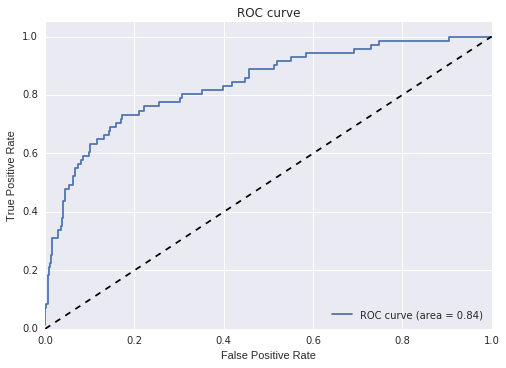

In [34]:
clf.fit(features_train , labels_train)

predicted = clf.predict(features_test)

print_clf_quality(labels_test, predicted)

labels_score = clf.decision_function(features_test)

print_roc_curve(labels_score, labels_test)

In [35]:
from sklearn.model_selection import KFold

class Ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        k_fold = KFold(n_splits=self.n_folds, shuffle=True, random_state=2016)
        folds = list(k_fold.split(y))
        S_train = np.zeros((X.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models):
            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred[:]

        self.stacker.fit(S_train, y)

    def predict(self, T):
        T = np.array(T)
        S_test = np.zeros((T.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models):
            # S_test_i = np.zeros((T.shape[0], self.n_folds)
            S_test[:, i] = clf.predict(T)[:]
            # S_test[:, i] = S_test_i.mean(1)
        y_pred = self.stacker.predict(S_test)[:]
        return y_pred
        
    def decision_function(self,T):
        T = np.array(T)
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        
        for i, clf in enumerate(self.base_models):
            # S_test_i = np.zeros((T.shape[0], self.n_folds)
            S_test[:, i] = clf.predict_proba(T)[:,1]
            # S_test[:, i] = S_test_i.mean(1)
        return self.stacker.decision_function(S_test)[:]

('accuracy: ', 0.88662131519274379)
('precision: ', 0.88411840575980416)
('recall: ', 0.88662131519274379)
('f1: ', 0.86585648752254529)

Confusion matrix :
[[366   4]
 [ 46  25]]


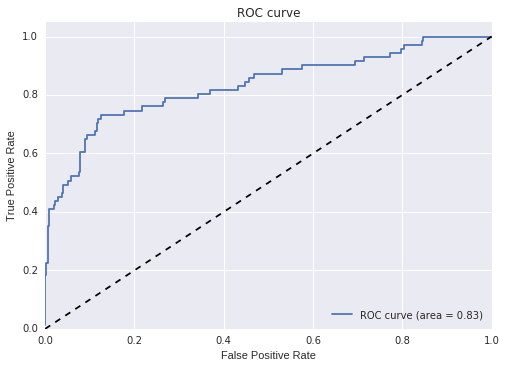

In [36]:
from sklearn.svm import SVC

en = LogisticRegression(C=0.5)

lg = LogisticRegression()

svm = SVC(C=0.1, kernel='rbf')

rf = RandomForestClassifier(n_estimators=100, n_jobs=2, max_depth=4,)

et = ExtraTreesClassifier(n_estimators=100, n_jobs=4, max_depth=4,)

ca = CalibratedClassifierCV(base_estimator=en, method='sigmoid')


xgbm = xgb.sklearn.XGBClassifier(max_depth=4, learning_rate=0.0051,
                                n_estimators=1000)

lgbm = lgb.LGBMClassifier(nthread=3,silent=True,learning_rate=0.0051,max_depth=4,n_estimators=1000)

model = Ensemble(5, en, [lg, rf,et,lgbm,xgbm])

model.fit(features_train , labels_train)

predicted = model.predict(features_test)

print_clf_quality(labels_test, predicted)


labels_score = model.decision_function(features_test)

print_roc_curve(labels_score, labels_test)